In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts import table, utils, eval, check_claim_structure as cs
from scripts.similarity import Similarity

experiments_path = os.path.abspath(os.path.expandvars("$GITHUB_HOME/claim-extraction/experiments"))

In [2]:
tables_file_path = os.path.join(experiments_path, 'extracted_tables/cs_tables.json')
dataset_path = os.path.join(experiments_path, 'output/cs_main')

d_results = eval.process_datasets(tables_file_path, dataset_path, False)

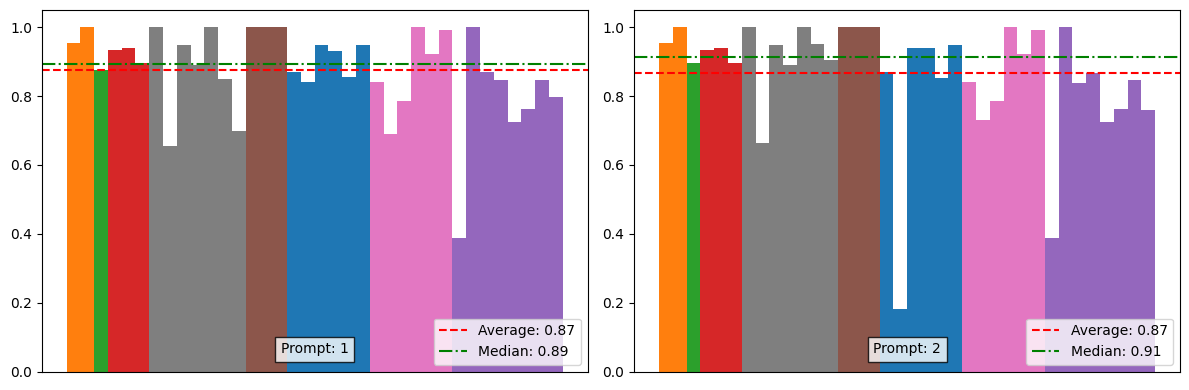

In [3]:
color_info = utils.plot_dataset_results(d_results, 2)

In [26]:
utils.show_key_group_colors(color_info)

Dir: 1
2303.03132(  )	1701.08288(  )	1806.07524(  )	1912.01728(  )	2307.01231(  )	2301.04770(  )	2304.12329(  )	2110.05362(  )	
Dir: 2
2303.03132(  )	1701.08288(  )	1806.07524(  )	1912.01728(  )	2307.01231(  )	2301.04770(  )	2304.12329(  )	2110.05362(  )	


In [4]:
# How it works
answers_path = os.path.join(experiments_path, 'output/cs_main/1/answers')
output_path = os.path.join(experiments_path, 'output/cs_main/1/claims.json')
tables_file_path = os.path.join(experiments_path, 'extracted_tables/cs_tables.json')

claims = cs.extract_answers(answers_path, output_path)
tables = table.load_tables_from_json(tables_file_path)

article_id = '2307.01231'
table_idx = 1

html_table = tables[article_id][table_idx]['table']
table_values, table_pd = cs.get_table_values(html_table)

claim_values = claims[article_id][table_idx]['extracted_claims']
claim_specs, claim_results, all_values_extracted = cs.count_specifications(claim_values)

unique_table_vales = utils.remove_duplicates(table_values)
unique_values_extracted = utils.remove_duplicates(all_values_extracted)

similarities = Similarity().find_similar_strings(unique_table_vales, unique_values_extracted)

eval.evaluate(similarities, table_values, all_values_extracted)

1.0

In [5]:
table_pd[0].head()

,DL-based,Token embedding,Schema,Entity similarity
,algorithm,context,awareness,context
0,DeepMatcher,Static,Homogeneous,Local
1,EMTransformer,Dynamic,Heterogeneous,Local
2,GNEM,"Static, Dynamic",Homogeneous,Global
3,HierMatcher,Dynamic,Heterogeneous,Local
4,DITTO,Dynamic,Heterogeneous,Local


In [6]:
similarities

{'Static': ['Static'],
 'Token embedding context': ['Token embedding context'],
 'Dynamic': ['Dynamic'],
 'DeepMatcher': ['DeepMatcher'],
 'GNEM': ['GNEM'],
 'Static, Dynamic': ['Static, Dynamic'],
 'Local': ['Local'],
 'DL-based algorithm': ['DL-based algorithm'],
 'Schema awareness': ['Schema awareness'],
 'Entity similarity context': ['Entity similarity context'],
 'EMTransformer': ['EMTransformer'],
 'Homogeneous': ['Homogeneous'],
 'Global': ['Global'],
 'HierMatcher': ['HierMatcher'],
 'DITTO': ['DITTO'],
 'Heterogeneous': ['Heterogeneous']}